### Task 1

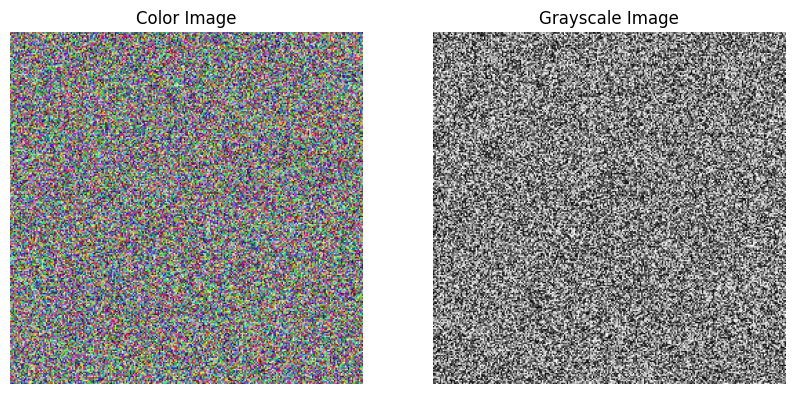

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set dimensions
width_color, height_color = 256, 256
width_gray, height_gray = 256, 256

# Check if total pixels are identical
total_pixels_color = width_color * height_color
total_pixels_gray = width_gray * height_gray

# Generate random noise images
color_image = np.random.rand(height_color, width_color, 3)  # three channel
gray_image = np.random.rand(height_gray, width_gray)

# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(color_image)
ax[0].set_title('Color Image')
ax[0].axis('off')

ax[1].imshow(gray_image, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.show()


### Task 2

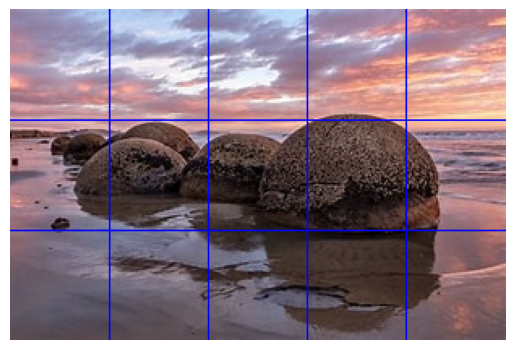

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    # Get image dimensions
    height, width, channels = img.shape

    # Calculate the size of each patch
    patch_width = width // num_horizontal_grid
    patch_height = height // num_vertical_grid

    # Create a copy of the image to draw grids on
    img_with_grids = img.copy()

    # Draw horizontal grid lines
    for i in range(1, num_vertical_grid):
        start_point = (0, i * patch_height)
        end_point = (width, i * patch_height)
        cv2.line(img_with_grids, start_point, end_point, line_color, 1)

    # Draw vertical grid lines
    for j in range(1, num_horizontal_grid):
        start_point = (j * patch_width, 0)
        end_point = (j * patch_width, height)
        cv2.line(img_with_grids, start_point, end_point, line_color, 1)

    return img_with_grids

# Example usage
img = 'color_image1.jpg'
num_horizontal_grid = 5 # x axis horizontal vector count
num_vertical_grid = 3  # y axis vertical vector count
line_color = (255, 0, 0) # Red color for grid lines

img_with_grids = crop_grid(cv2.imread(img), num_horizontal_grid, num_vertical_grid, line_color)

# Display the image with grids
plt.imshow(cv2.cvtColor(img_with_grids, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Task 3

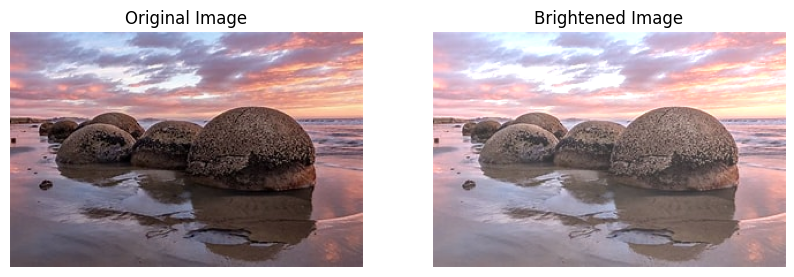

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness_add(img, value):
    # Convert the image to float32 for precision
    img_float = img.astype(np.float32)
    # Add the value to the image
    # print(img_float[0][0][0])  # for test purpose
    img_bright = img_float + value
    # print(img_bright[0][0][0])
    # Clip the values to be in the valid range [0, 255]
    img_bright = np.clip(img_bright, 0, 255)  # avoid outbound the color range
    # Convert back to uint8
    img_bright = img_bright.astype(np.uint8)
    return img_bright

# Load an example image
img = cv2.imread('color_image1.jpg')  # Make sure to use a valid image path

# Adjust the brightness
value = 50  # Increase brightness of 50 value
bright_img = adjust_brightness_add(img, value)

# Display the original and brightened images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Brightened Image')
plt.imshow(cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


###  Task 4

#### RGB:
---
It is a traditional color space. Common use case of RGB is that our traditional camera, where when using them to capturing the images, they are using sensor to record the intensity of red, green, and blue light. Another example is that back in old days, the old TV which sometime will have random pixel values (like what we did in the first task) when the signal getting lost.

#### HSV:
---
HSV is a bit newer when compare to RGB, it provides us the additional feature which is the Saturation, Saturation store the pureness of the hue color. The application of HSV could be used in Vision Recognition as it embeded the value for varying lighting conditions. 

#### CIELAB:
---
CIELAB conpose of four unique colors: read, green, blue, and yellow.
"CIELAB was intended as a perceptually uniform space, where a given numerical change corresponds to a similar perceived change in color. While the LAB space is not truly perceptually uniform" from wiki
Which enable us to have the precise color matching and vary of color value. The a* and b* range from −128 to 127.

And precise color matching is impotant in some industries, example of paint manufacturing. Making it ideal for quality control and color difference measurement.